In [3]:
import os
import glob
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import cv2
#from moviepy.editor import VideoFileClip
#import skvideo.io
import scipy
#myclip = VideoFileClip("some_vide
import pandas as pd

In [4]:
movieDir = r'G:\My Drive\adenosine_paper_data\behavior\free behavior\20230214_caged_atp\atp'
movieList = sorted(glob.glob(movieDir + '\\*'))
atp_means = []
onset_peak = {}
onset_peak['condition'] = []
onset_peak['value'] = []
onsets = [21,24,19,21,18,20,24,20,24,20]
peaks = [31,31,33,30,28,28,30,27,30,27]
print(np.mean(onsets))
print(np.mean(peaks))
counter = 0
for movie in movieList:
    cap = cv2.VideoCapture(movie)
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    buf = np.empty((frameCount, frameHeight, frameWidth), np.dtype('uint8'))

    fc = 0
    ret = True

    while (fc < frameCount  and ret):
        ret, image = cap.read()
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
        buf[fc] = gray_image
        fc += 1
    
    a = np.abs(np.diff(buf,axis=0))
    motion = np.mean(np.mean(a,axis=2),axis=1)
    #buf2 = np.mean(np.mean(buf,axis=1),axis=1)
    motion = scipy.signal.medfilt(motion,11)
    motion = motion / np.max(motion)
    atp_means.append(motion)
    plt.figure()
    plt.plot(motion)
    plt.plot(onsets[counter],motion[onsets[counter]],'.')
    plt.plot(peaks[counter],motion[peaks[counter]],'.')
    onset_peak['value'].append(onsets[counter])
    onset_peak['condition'].append('atp_onset')
    onset_peak['value'].append(peaks[counter])
    onset_peak['condition'].append('atp_peak')
    counter = counter + 1

21.1
29.5


In [5]:
import scipy.signal

21.0
28.9


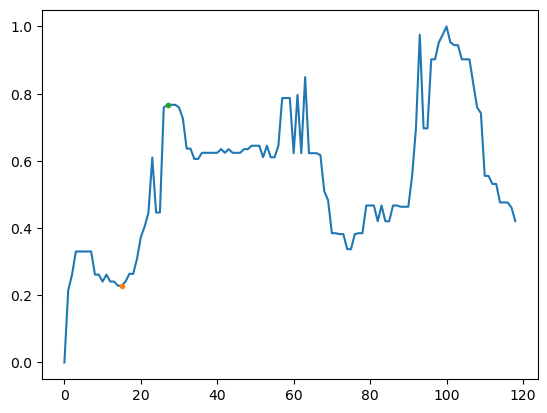

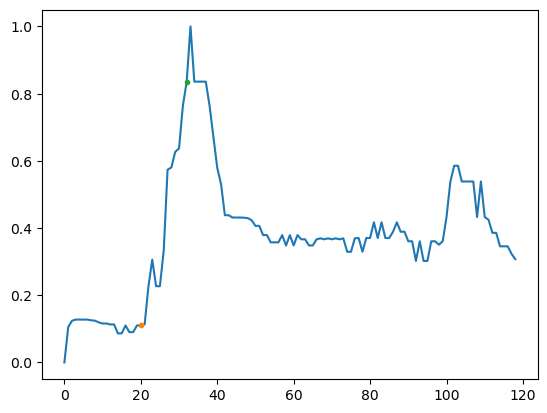

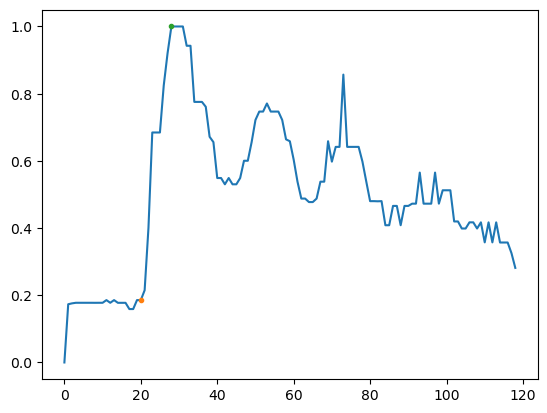

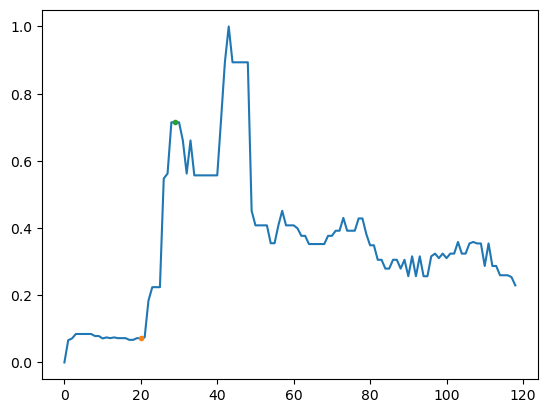

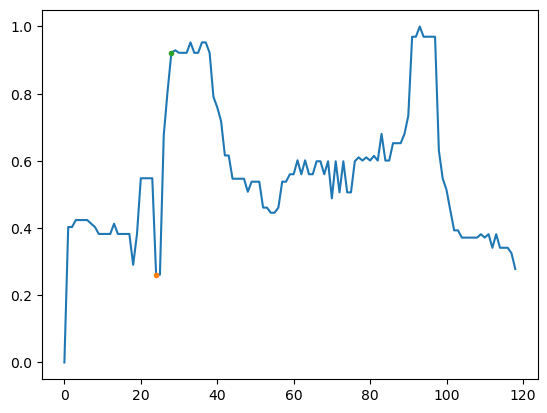

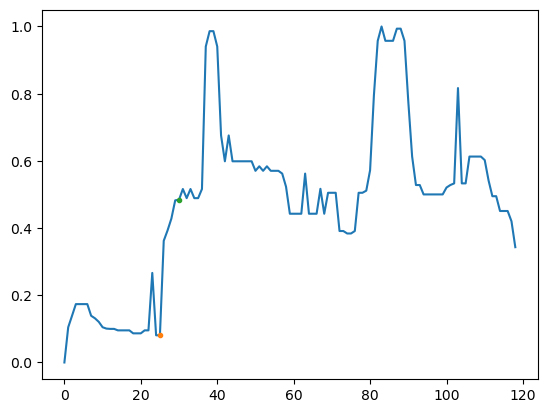

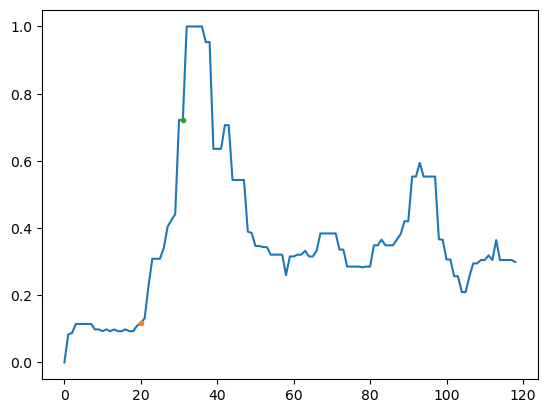

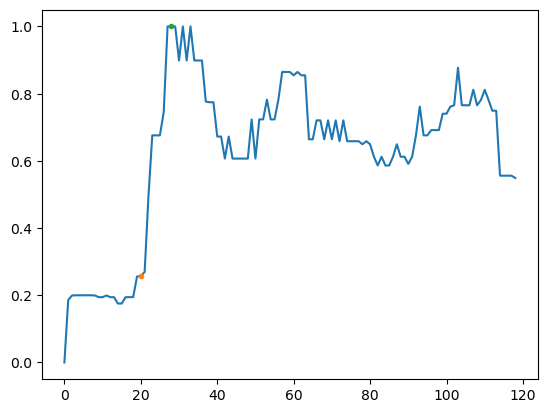

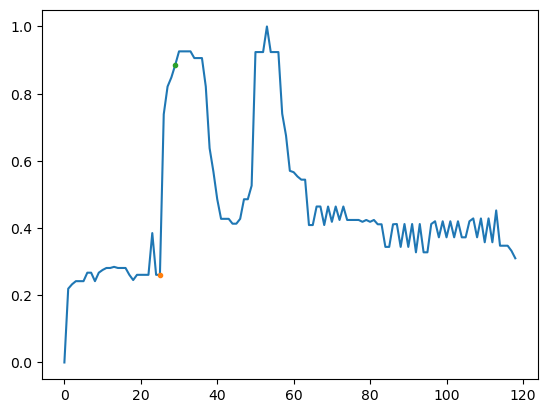

In [6]:
movieDir = r'G:\My Drive\adenosine_paper\adenosine_paper_data\behavior\free behavior\20230214_caged_atp\control'
movieList = sorted(glob.glob(movieDir + '\\*'))
ctrl_means = []
counter = 0
onsets = [15,20,20,20,24,25,20,20,25]
peaks = [27,32,28,29,28,30,31,28,29,27]
print(np.mean(onsets))
print(np.mean(peaks))
for movie in movieList:
    cap = cv2.VideoCapture(movie)
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    buf = np.empty((frameCount, frameHeight, frameWidth), np.dtype('uint8'))

    fc = 0
    ret = True

    while (fc < frameCount  and ret):
        ret, image = cap.read()
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
        buf[fc] = gray_image
        fc += 1
    
    a = np.abs(np.diff(buf,axis=0))
    motion = np.mean(np.mean(a,axis=1),axis=1)
    motion = scipy.signal.medfilt(motion,11)
    motion = motion / np.max(motion)
    ctrl_means.append(motion)
    plt.figure()
    plt.plot(motion)
    plt.plot(onsets[counter],motion[onsets[counter]],'.')
    plt.plot(peaks[counter],motion[peaks[counter]],'.')
    onset_peak['value'].append(onsets[counter])
    onset_peak['condition'].append('ctrl_onset')
    onset_peak['value'].append(peaks[counter])
    onset_peak['condition'].append('ctrl_peak')
    counter = counter + 1

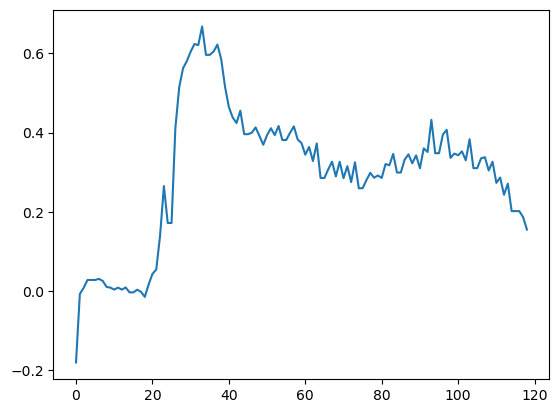

In [38]:
ctrl_means = np.array(ctrl_means)
mean_ctrl_means = np.mean(ctrl_means,axis=0)
mean_ctrl_means = mean_ctrl_means - np.mean(mean_ctrl_means[:20])
std_ctrl_means = np.std(ctrl_means)/np.sqrt(len(ctrl_means))
plt.figure()
plt.plot(mean_ctrl_means)

21.0
28.9


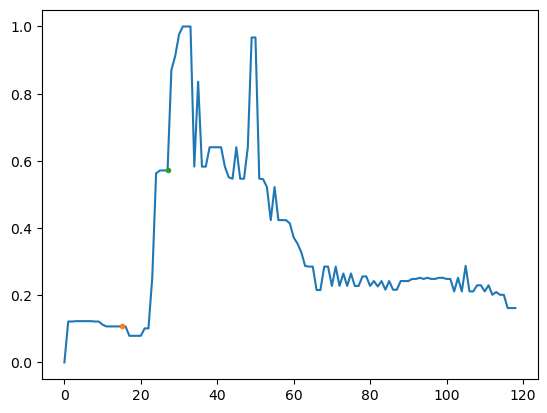

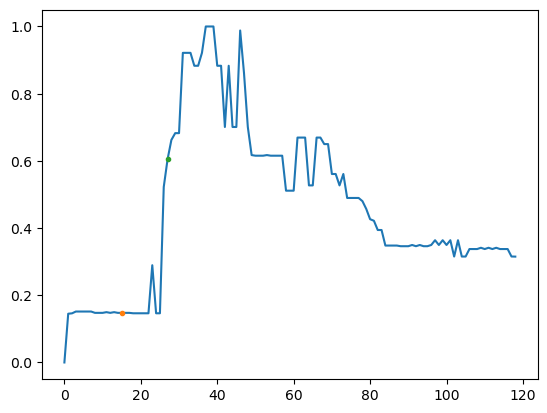

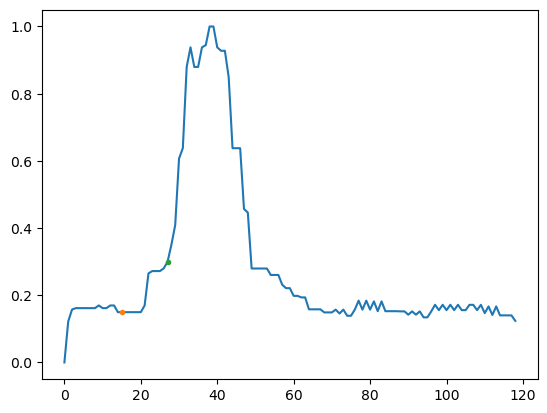

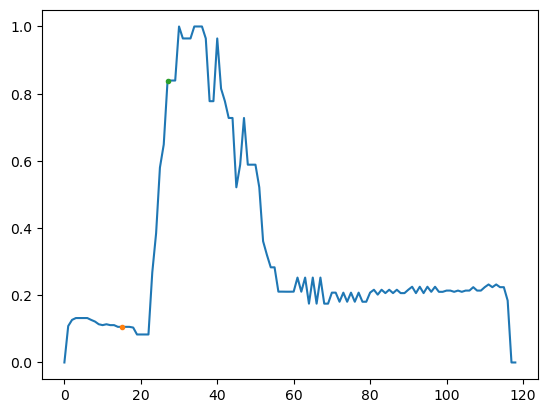

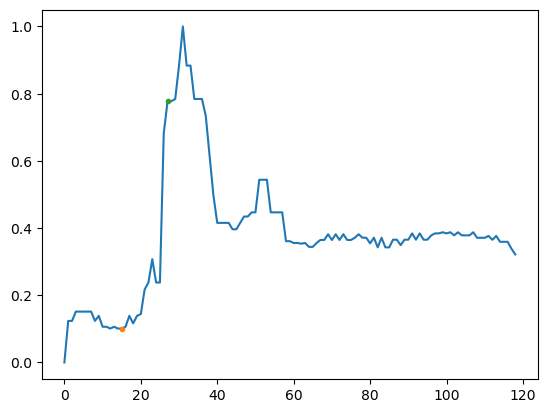

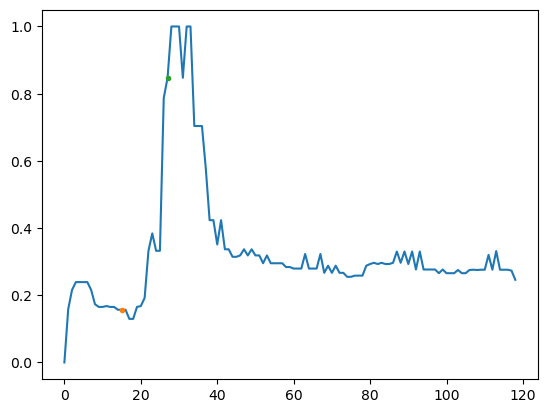

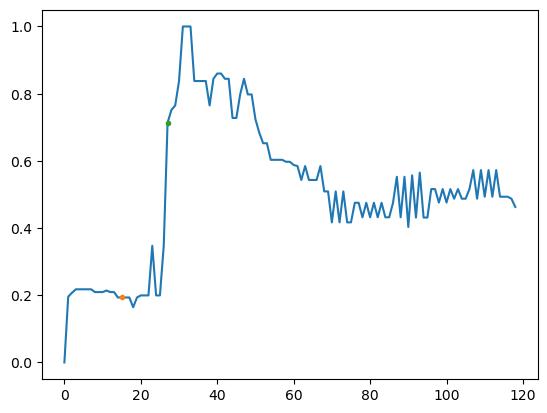

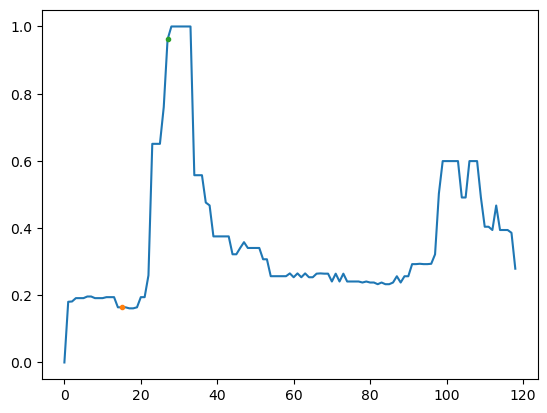

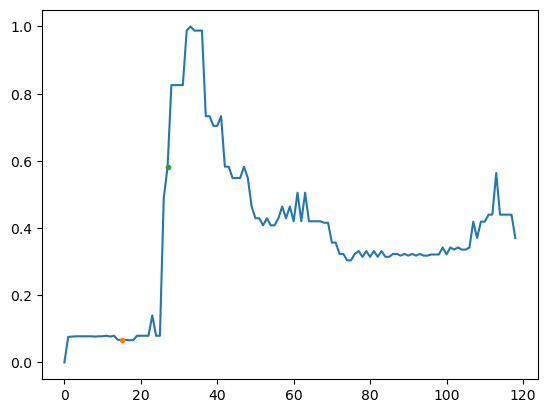

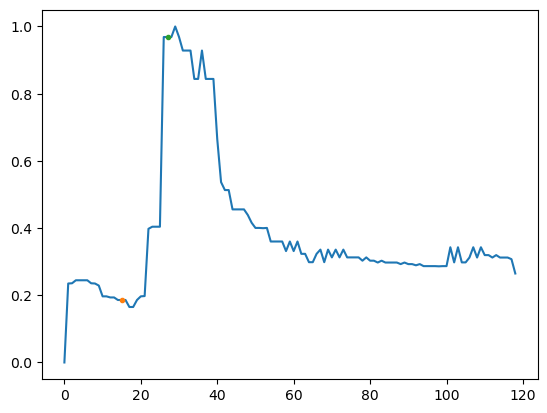

In [8]:
movieDir = r'G:\My Drive\adenosine_paper\adenosine_paper_data\behavior\free behavior\20230214_caged_atp\atp'
movieList = sorted(glob.glob(movieDir + '\\*'))
atp_means = []

onsets = [15,20,20,20,24,25,20,20,25]
peaks = [27,32,28,29,28,30,31,28,29,27]
print(np.mean(onsets))
print(np.mean(peaks))
for movie in movieList:
    counter = 0
    cap = cv2.VideoCapture(movie)
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    buf = np.empty((frameCount, frameHeight, frameWidth), np.dtype('uint8'))

    fc = 0
    ret = True

    while (fc < frameCount  and ret):
        ret, image = cap.read()
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
        buf[fc] = gray_image
        fc += 1
    
    a = np.abs(np.diff(buf,axis=0))
    motion = np.mean(np.mean(a,axis=1),axis=1)
    motion = scipy.signal.medfilt(motion,11)
    motion = motion / np.max(motion)
    atp_means.append(motion)
    plt.figure()
    plt.plot(motion)
    plt.plot(onsets[counter],motion[onsets[counter]],'.')
    plt.plot(peaks[counter],motion[peaks[counter]],'.')
    onset_peak['value'].append(onsets[counter])
    onset_peak['condition'].append('ctrl_onset')
    onset_peak['value'].append(peaks[counter])
    onset_peak['condition'].append('ctrl_peak')
    counter = counter + 1

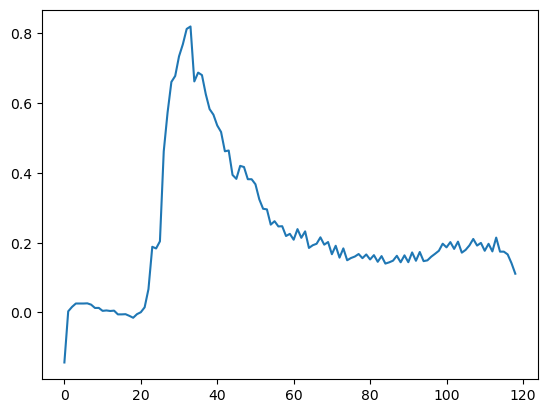

In [36]:
atp_means = np.array(atp_means)
mean_atp_means = np.mean(atp_means,axis=0)
mean_atp_means = mean_atp_means - np.mean(mean_atp_means[:20])
std_atp_means = np.std(atp_means)/np.sqrt(len(atp_means))
plt.figure()
plt.plot(mean_atp_means)

21.0
28.9


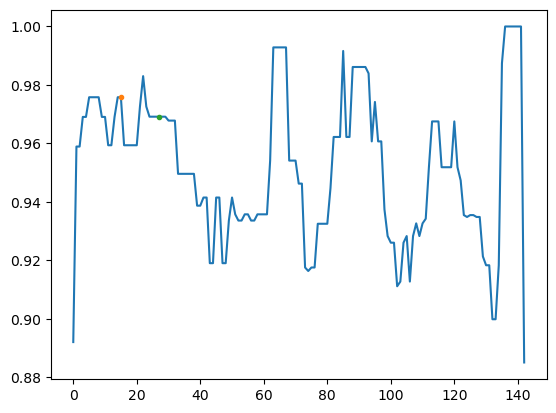

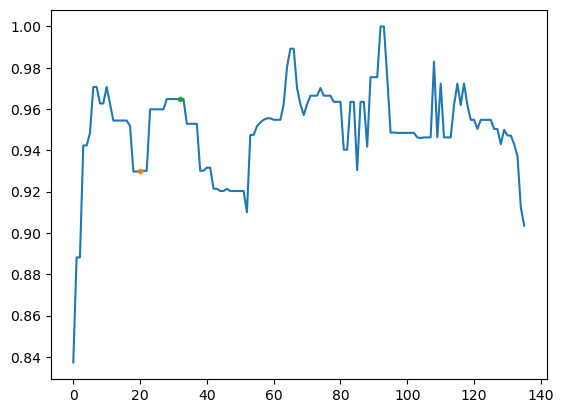

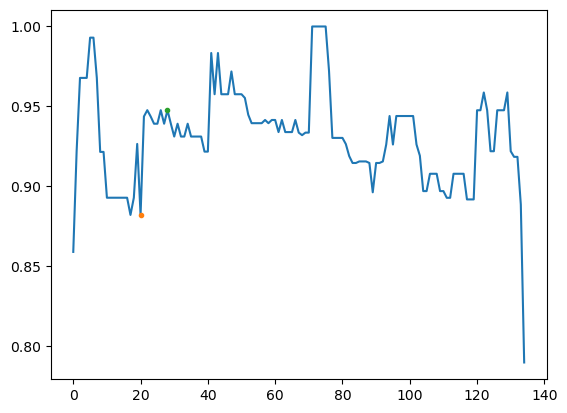

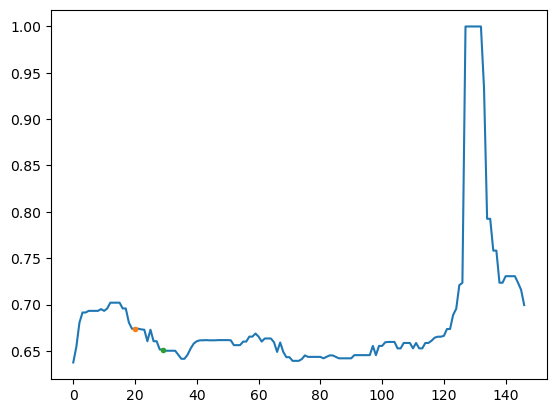

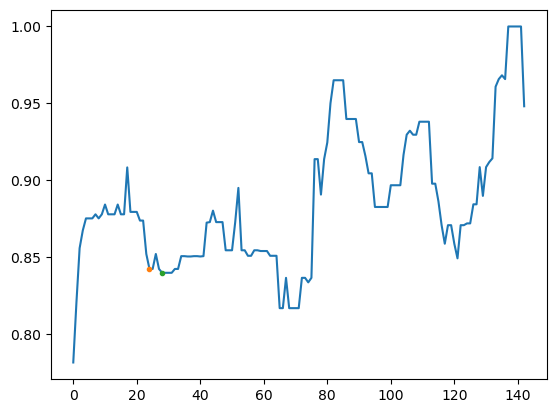

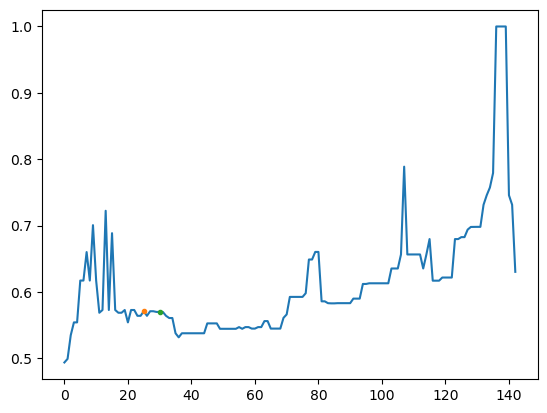

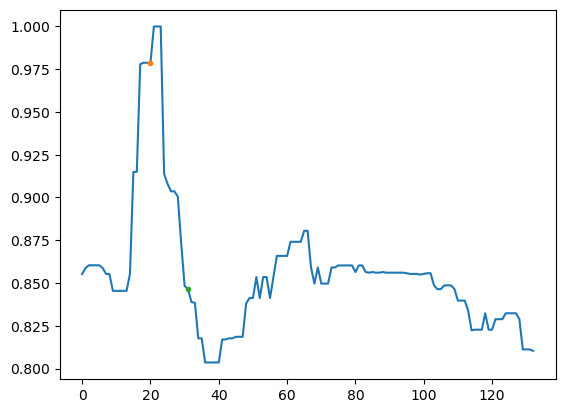

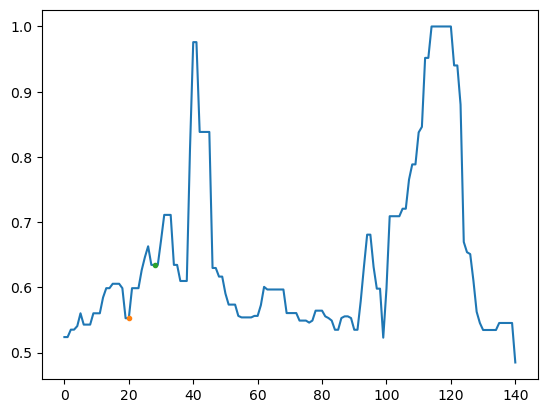

In [28]:
movieDir = r'G:\My Drive\adenosine_paper\adenosine_paper_figures\Fig3\revision\red_light_control\downsample'
movieList = sorted(glob.glob(movieDir + '\\*'))
neg_means = []
counter = 0
onsets = [15,20,20,20,24,25,20,20,25]
peaks = [27,32,28,29,28,30,31,28,29,27]
print(np.mean(onsets))
print(np.mean(peaks))
for movie in movieList:

    cap = cv2.VideoCapture(movie)
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    buf = np.empty((frameCount, frameHeight, frameWidth), np.dtype('uint8'))

    fc = 0
    ret = True

    while (fc < frameCount  and ret):
        ret, image = cap.read()
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
        buf[fc] = gray_image
        fc += 1
    
    a = np.abs(np.diff(buf,axis=0))
    motion = np.mean(np.mean(a,axis=1),axis=1)
    motion = scipy.signal.medfilt(motion,11)
    motion = motion / np.max(motion)
    neg_means.append(motion[:120])
    plt.figure()
    plt.plot(motion)
    plt.plot(onsets[counter],motion[onsets[counter]],'.')
    plt.plot(peaks[counter],motion[peaks[counter]],'.')
    onset_peak['value'].append(onsets[counter])
    onset_peak['condition'].append('ctrl_onset')
    onset_peak['value'].append(peaks[counter])
    onset_peak['condition'].append('ctrl_peak')
    counter = counter + 1

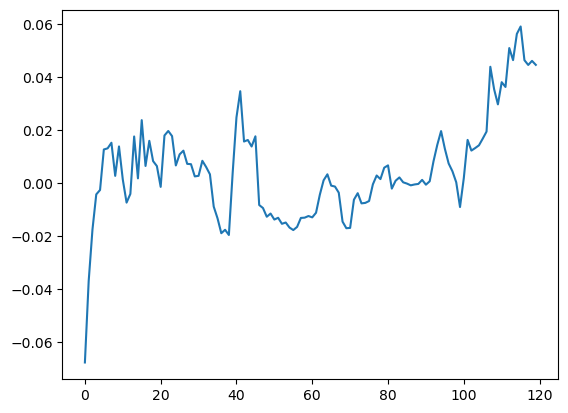

In [34]:
neg_means = np.array(neg_means)
mean_neg_means = np.mean(neg_means,axis=0)
mean_neg_means = mean_neg_means - np.mean(mean_neg_means[:20])

std_neg_means = np.std(neg_means)/np.sqrt(len(neg_means))
plt.figure()
plt.plot(mean_neg_means)

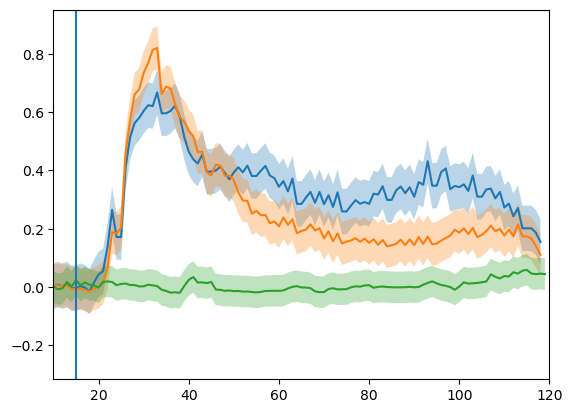

In [44]:
plt.figure()
plt.plot(mean_ctrl_means)
plt.fill_between(x=range(len(mean_ctrl_means)),y1=(mean_ctrl_means-std_ctrl_means),y2=(mean_ctrl_means + std_ctrl_means),alpha = 0.3)
plt.plot(mean_atp_means)
plt.fill_between(x=range(len(mean_atp_means)),y1=(mean_atp_means-std_atp_means),y2=(mean_atp_means + std_atp_means),alpha = 0.3)
plt.plot(mean_neg_means)
plt.fill_between(x=range(len(mean_neg_means)),y1=(mean_neg_means-std_neg_means),y2=(mean_neg_means + std_neg_means),alpha = 0.3)
plt.xlim(10,120)
plt.axvline(x=15)
plt.savefig(r'G:\My Drive\adenosine_paper\adenosine_paper_figures\Fig3\revision\npe_atp_swim_traces.svg',dpi=300)

In [16]:
motion

array([], dtype=float64)

In [67]:
movie = r'G:\My Drive\adenosine_paper_data\behavior\free behavior\20230214_caged_atp\control\ctrl_f2.avi'

cap = cv2.VideoCapture(movie)
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

buf = np.empty((frameCount, frameHeight, frameWidth), np.dtype('float'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, image = cap.read()
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    buf[fc] = gray_image
    fc += 1


In [69]:
thresh = 5
threshu = 100
pre1 = np.max(buf[31:34],axis=0)
pre1[np.where(pre1>threshu)] = 0
pre1[np.where(pre1<thresh)] = 0
pre1[np.where(pre1>thresh)] = 100
pre2 = np.max(buf[34:37],axis=0)
pre2[np.where(pre2>threshu)] = 0
pre2[np.where(pre2<thresh)] = 0
pre2[np.where(pre2>thresh)] = 100
pre3 = np.max(buf[37:40],axis=0)
pre3[np.where(pre3>threshu)] = 0
pre3[np.where(pre3<thresh)] = 0
pre3[np.where(pre3>thresh)] = 100

ValueError: zero-size array to reduction operation maximum which has no identity

In [71]:
plt.figure()
plt.imshow(pre1,vmin = 0,vmax=100)
plt.figure()
plt.imshow(pre2,vmin = 0,vmax=100)
plt.figure()
plt.imshow(pre3,vmin = 0,vmax=100)

NameError: name 'pre1' is not defined

<Figure size 640x480 with 0 Axes>

In [52]:
imageraw = np.zeros([3,np.shape(pre1)[0],np.shape(pre1)[1]])
imageraw[0] = pre1
imageraw[1] = pre2
imageraw[2] = pre3

In [53]:
image = np.zeros([3,np.shape(pre1)[0],np.shape(pre1)[1]])

In [54]:
a = np.where(pre1>0)

In [55]:
image1 = np.array([pre1/100 * 127/255, pre1/100 * 22/255, pre1/100 * 52/255])
image2 = np.array([pre2/100 * 220/255, pre2/100 * 171/255, pre2/100 * 39/255])
image3 = np.array([pre3/100 * 56/255, pre3/100 * 72/255, pre3/100 * 158/255])

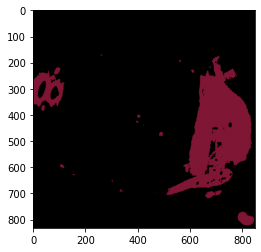

In [58]:
plt.figure()
plt.imshow(np.transpose(image1,(1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


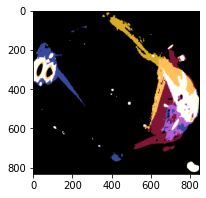

In [384]:
imagemean = (image1 + image2 + image3)

plt.figure(figsize=(3,3))
plt.imshow(np.transpose(imagemean,(1,2,0)))
plt.savefig(r'G:\My Drive\adenosine_paper_figures\fig S3\pre.svg',dpi=300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


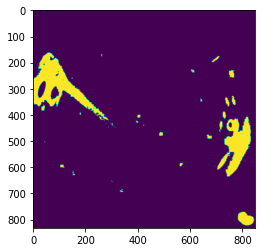

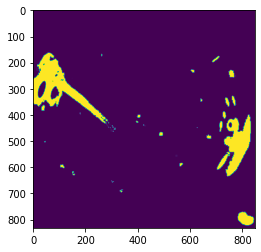

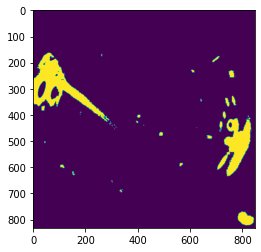

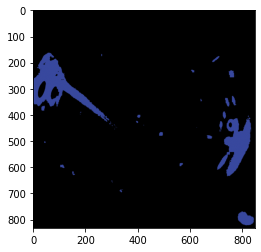

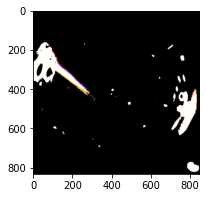

In [387]:
thresh = 5
threshu = 100
pre1 = np.max(buf[100:103],axis=0)
pre1[np.where(pre1>threshu)] = 0
pre1[np.where(pre1<thresh)] = 0
pre1[np.where(pre1>thresh)] = 100
pre2 = np.max(buf[103:106],axis=0)
pre2[np.where(pre2>threshu)] = 0
pre2[np.where(pre2<thresh)] = 0
pre2[np.where(pre2>thresh)] = 100
pre3 = np.max(buf[106:109],axis=0)
pre3[np.where(pre3>threshu)] = 0
pre3[np.where(pre3<thresh)] = 0
pre3[np.where(pre3>thresh)] = 100
plt.figure()
plt.imshow(pre1,vmin = 0,vmax=100)
plt.figure()
plt.imshow(pre2,vmin = 0,vmax=100)
plt.figure()
plt.imshow(pre3,vmin = 0,vmax=100)
imageraw = np.zeros([3,np.shape(pre1)[0],np.shape(pre1)[1]])
imageraw[0] = pre1
imageraw[1] = pre2
imageraw[2] = pre3
image = np.zeros([3,np.shape(pre1)[0],np.shape(pre1)[1]])
image1 = np.array([pre1/100 * 127/255, pre1/100 * 22/255, pre1/100 * 52/255])
image2 = np.array([pre2/100 * 220/255, pre2/100 * 171/255, pre2/100 * 39/255])
image3 = np.array([pre3/100 * 56/255, pre3/100 * 72/255, pre3/100 * 158/255])
plt.figure()
plt.imshow(np.transpose(image3,(1,2,0)))
imagemean = (image1 + image2 + image3)

plt.figure(figsize=(3,3))
plt.imshow(np.transpose(imagemean,(1,2,0)))
plt.savefig(r'G:\My Drive\adenosine_paper_figures\fig S3\post.svg',dpi=300)